## Dengue Fever Prediction
By: Jack Ross

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_train.csv'),
                 pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_labels_train.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_test.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/submission_format.csv')

In [3]:
train, val = train_test_split(train, test_size=.3,  
                              random_state=42)

## 231 Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?

In [4]:
target = 'total_cases'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [5]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

- [X] Is your problem regression or classification?

In [6]:
# My problem is a regression problem. I am trying to find a numerical
# (continuous) value for total_cases. 

- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.

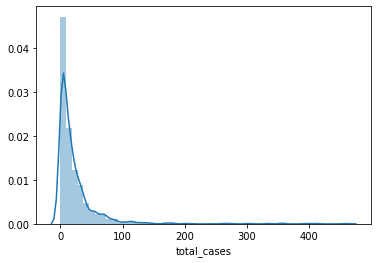

In [7]:
import seaborn as sns
sns.distplot(y_train)

# The target seems to be right-skewed

In [8]:
y_train_log = np.log1p(y_train)

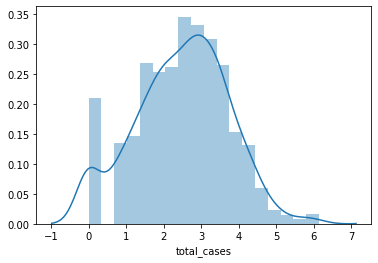

In [9]:
sns.distplot(y_train_log)

- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

In [10]:
# I will use root mean squared error (RMSE) for my evalutation metric
# FOR NOW. After I clean the data and look for outliers, I will revisit
# this because RMSE harshly penalizes outliers. I will also use 
# adjusted R squared because it will allow me to know how useful my
# predictor terms are.

- [X] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?

In [11]:
# I have done a 30% random split with train/val

In [12]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
464,sj,1999,13,1999-04-02,0.054100,-0.098100,0.157267,0.137057,15.91,298.308571,...,78.910000,15.91,15.732857,2.314286,25.742857,6.900000,30.6,21.7,7.9,22
471,sj,1999,20,1999-05-21,NaN,0.090667,0.194471,0.169157,33.82,299.775714,...,76.598571,33.82,16.651429,3.185714,27.828571,7.328571,33.3,23.3,14.3,20
1328,iq,2008,3,2008-01-15,0.188229,0.220829,0.233243,0.169971,95.97,298.034286,...,94.968571,95.97,18.865714,8.585714,27.433333,9.466667,33.8,21.8,125.3,26
435,sj,1998,37,1998-09-10,0.074650,0.057967,0.151886,0.122000,72.73,300.147143,...,84.002857,72.73,18.724286,2.028571,28.328571,6.842857,32.2,24.4,61.3,99
1206,iq,2005,36,2005-09-10,0.335429,0.200714,0.322886,0.309143,36.98,300.058571,...,71.971429,36.98,15.518571,13.714286,NaN,NaN,NaN,21.8,44.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,iq,2003,30,2003-07-23,0.285814,0.163071,0.288029,0.277457,2.64,296.485714,...,77.804286,2.64,13.558571,11.428571,26.466667,10.366667,32.1,18.0,9.9,1
1130,iq,2004,13,2004-03-25,0.306283,0.198720,0.029880,0.290150,120.10,297.312857,...,96.238571,120.10,18.237143,5.714286,28.650000,9.300000,34.0,23.6,142.6,3
1294,iq,2007,21,2007-05-21,0.364614,0.256829,0.329900,0.349686,64.11,297.232857,...,94.852857,64.11,17.718571,8.957143,28.250000,10.550000,33.8,21.7,86.6,5
860,sj,2006,45,2006-11-12,-0.276100,-0.033100,0.215317,0.184357,6.61,300.880000,...,75.568571,6.61,17.617143,2.585714,27.985714,6.128571,31.7,24.4,18.0,20


In [13]:
val

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
497,sj,1999,46,1999-11-19,-0.045400,0.074700,0.051480,0.039433,83.66,298.968571,...,85.404286,83.66,17.817143,1.814286,26.714286,5.800000,30.6,22.8,62.1,43
1261,iq,2006,39,2006-10-01,0.465500,0.241543,0.473400,0.493443,134.64,299.381429,...,82.845714,134.64,17.254286,11.285714,28.566667,12.400000,35.2,22.0,63.0,6
411,sj,1998,13,1998-03-26,NaN,0.073100,0.188167,0.168500,0.00,298.502857,...,76.675714,0.00,15.480000,2.557143,26.228571,6.900000,31.1,22.2,16.5,38
1046,iq,2002,33,2002-08-13,0.377157,0.305900,0.288400,0.360843,9.81,298.304286,...,69.060000,9.81,13.441429,14.385714,27.833333,12.233333,35.1,20.6,7.1,7
1033,iq,2002,20,2002-05-14,0.133800,0.109633,0.219614,0.141700,46.79,296.784286,...,97.242857,46.79,17.744286,5.085714,26.866667,9.700000,32.3,20.8,543.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,sj,1996,29,1996-07-15,0.112100,0.095425,0.167429,0.164543,97.22,299.018571,...,84.322857,97.22,17.538571,2.242857,27.271429,5.628571,31.1,23.9,53.6,11
1286,iq,2007,13,2007-03-26,0.238671,0.244743,0.216229,0.259186,93.14,297.835714,...,93.585714,93.14,18.214286,8.242857,28.250000,9.600000,34.6,21.5,66.1,6
724,sj,2004,14,2004-04-01,NaN,0.023175,0.147629,0.158386,28.35,296.894286,...,80.365714,28.35,14.721429,2.414286,24.700000,6.028571,28.9,20.6,60.7,4
538,sj,2000,35,2000-09-02,NaN,0.243500,0.277600,0.193786,164.26,299.960000,...,82.675714,164.26,18.231429,2.300000,27.185714,6.442857,31.1,21.7,156.6,4


- [X] Begin to clean and explore your data.

In [14]:
# Cleaning Checklist

# Null values - impute later
# Time series - already date time, make features
# Location split? - to do
# Numerical issues - none

In [15]:
train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [16]:
# Null value cleaning

train.isnull().sum()


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  135
ndvi_nw                                   35
ndvi_se                                   14
ndvi_sw                                   14
precipitation_amt_mm                      11
reanalysis_air_temp_k                      8
reanalysis_avg_temp_k                      8
reanalysis_dew_point_temp_k                8
reanalysis_max_air_temp_k                  8
reanalysis_min_air_temp_k                  8
reanalysis_precip_amt_kg_per_m2            8
reanalysis_relative_humidity_percent       8
reanalysis_sat_precip_amt_mm              11
reanalysis_specific_humidity_g_per_kg      8
reanalysis_tdtr_k                          8
station_avg_temp_c                        35
station_diur_temp_rng_c                   35
station_max_temp_c                        16
station_mi

In [17]:
# Column name issues

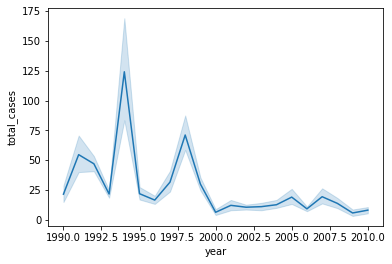

In [18]:
sns.lineplot(x='year', y='total_cases',data=train)

# A lot of values that should be ints are displayed as floats

- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [21]:
# Testing: splitting the data into 2 dataframes based on location
sj_train = train.loc[train['city'] == 'sj']
iq_train = train.loc[train['city'] == 'iq']

- [ ] Continue to clean and explore your data.

In [19]:
# Time series cleaning / feature engineering


## SEASONS - I think seasonality could play into total cases of Dengue because the disease spreads from mosquitos
#            that thrive in hot/wet conditions.

# The climate of Puerto Rico is tropical, hot all year round, with a hot and muggy season from May to October
# and a relatively cool season from December to March, with November and April as intermediate months.

# Peru has two seasons owing to its proximity to the equator. These are not traditionally known as summer and
# winter, but as the rainy/wet season ('summer') which runs from December to March, and the dry season ('winter')
# which runs from May to September.

# SJ - hot/muggy season = YYYY-05-DD through YYYY-10-DD
# SJ - cool season = YYYY-12-DD through YYYY-03-DD
# SJ - intermediate season = YYYY-11-DD AND NOT THROUGH YYYY-04-DD

# IQ - rainy season = YYYY-12-DD through YYYY-03-DD
# IQ - dry season = YYYY-05-DD through YYYY-09-DD

from datetime import date, datetime

In [37]:
sj_train['month'] = pd.DatetimeIndex(sj_train['week_start_date']).month
iq_train['month'] = pd.DatetimeIndex(iq_train['week_start_date']).month

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
print('San Juan')
print('features: ', sj_train.shape)

print('\nIquitos')
print('features: ', iq_train.shape)

San Juan
features:  (660, 26)

Iquitos
features:  (359, 26)


In [39]:
# compute the correlations
sj_correlations = sj_train.corr()
iq_correlations = iq_train.corr()

Text(0.5, 1, 'San Juan Variable Correlations')

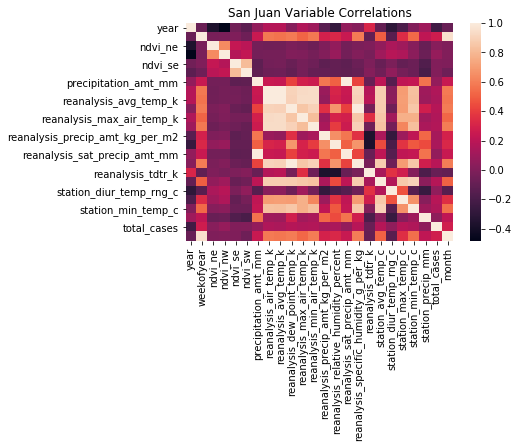

In [40]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

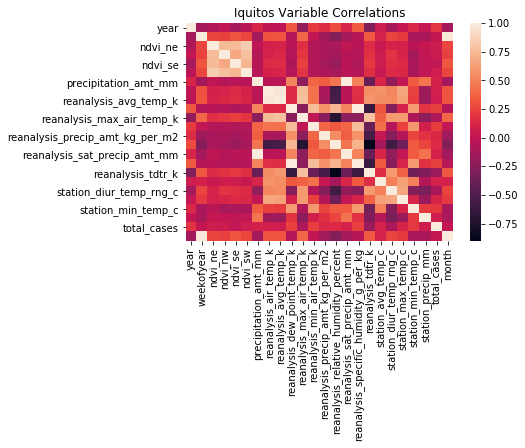

In [41]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

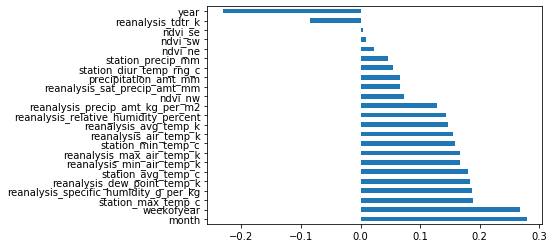

In [42]:
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

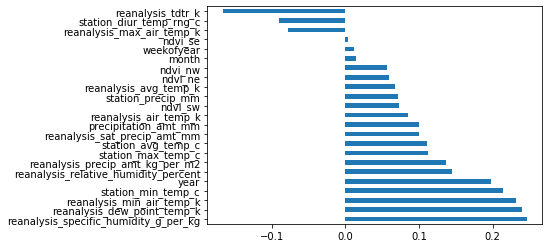

In [43]:
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

- [ ] For the evaluation metric you chose, what score would you get just by guessing?

- [ ] Can you make a fast, first model that beats guessing?